In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import datasets
nba_attendance = pd.read_csv("Datasets/NBA_Attendance_2019-2023.csv")
wnba_game_attendance = pd.read_csv("Datasets/WNBA Game Attendance.csv")

In [6]:
# Lists of teams we're considering
wnba_teams = ['Atlanta Dreams','Chicago Sky','Dallas Wings','Indiana Fever','Los Angeles Sparks','Phoenix Mercury','Minnesota Lynx','New York Liberty','Las Vegas Aces','Seattle Storm']
nba_teams = ['Atlanta Hawks','Chicago Bulls','Dallas Mavericks','Indiana Pacers','Los Angeles Lakers','Phoenix Suns','Minnesota Timberwolves','New York Knicks','Golden State Warriors','Oklahoma City Thunder']

In [7]:
# Remove rows with no attendance data
wnba_game_attendance.dropna(subset = ["Attendance"], inplace = True)

In [8]:
# Drop duplicate rows
wnba_game_attendance.drop_duplicates(["Year","Date","Location","Attendance"], inplace = True)

In [9]:
# Create dictionary with all games each team played
wnba_team_data = {}
for team in wnba_teams:
    wnba_team_data[team] = wnba_game_attendance.loc[(wnba_game_attendance["Team"] == team) | (wnba_game_attendance["Opponent"] == team)]
    
# Create new dataframe to mat
columns = ["Year",
           "Team",
           "Overall Games",
           "Overall Average",
           "Overall Percent"]

wnba_attendance = pd.DataFrame(columns = columns)
# Go through each team
for team in wnba_team_data:
    team_data = wnba_team_data[team]
    
    # For each team, go through years 2019-2023
    for year in range(2019, 2024):
        cap_sum = 0
        
        # All games that this team played in year
        year_games = team_data[team_data["Year"] == year]
        num_games = year_games.size
        avg_attendance = year_games["Attendance"].mean()
        percent_attendance = year_games["Attendance"].sum() * 100 / year_games["Venue Capacity"].sum()
                
        team_year_data = [year,
                          team,
                          num_games,
                          round(avg_attendance,0),
                          round(percent_attendance,1)]
        
        team_year_data_df = pd.DataFrame([team_year_data], columns = columns)
        
        wnba_attendance = pd.concat([wnba_attendance, team_year_data_df], ignore_index = True)

C:\Users\skp95\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


In [10]:
# Clean resultant dataframe
wnba_attendance.dropna(inplace = True)
wnba_attendance.reset_index(inplace = True)

In [11]:
rankings = {2019:['Washington Mystics','Conneticut Sun','Los Angeles Sparks','Las Vegas Aces','Chicago Sky','Seattle Storm','Minnesota Lynx','Phoenix Mercury','Indiana Fever','Dallas Wings','New York Liberty','Atlanta Dreams'], 
            2020: ['Las Vegas Aces','Seattle Storm','Los Angeles Sparks','Minnesota Lynx','Phoenix Mercury','Chicago Sky','Conneticut Sun','Washington Mystics','Dallas Wings','Atlanta Dreams','Indiana Fever','New York Liberty'], 
            2021: ['Conneticut Sun','Las Vegas Aces','Minnesota Lynx','Seattle Storm','Phoenix Mercury','Chicago Sky','Dallas Wings','New York Liberty','Washington Mystics','Los Angeles Sparks','Atlanta Dreams','Indiana Fever'], 
            2022: ["Las Vegas Aces",'Chicago Sky','Conneticut Sun','Seattle Storm','Washington Mystics','Dallas Wings','New York Liberty','Phoenix Mercury','Minnesota Lynx','Atlanta Dreams','Los Angeles Sparks','Indiana Fever'], 
            2023: ['Las Vegas Aces','New York Liberty','Conneticut Sun','Dallas Wings','Atlanta Dreams','Minnesota Lynx','Washington Mystics','Chicago Sky','Los Angeles Sparks','Phoenix Mercury','Seattle Storm','Indiana Fever']}

# Creat new column called ranking
wnba_attendance.rename(columns = {"index": "Ranking"}, inplace = True)

for row in range(wnba_attendance.shape[0]):
    team = wnba_attendance["Team"][row]
    year = wnba_attendance["Year"][row]
    try:
        wnba_attendance["Ranking"][row] = rankings[year].index(team) + 1
    except ValueError:
        wnba_attendance["Ranking"][row] = "NA"

# Sort dataframe & reset index
wnba_attendance.sort_values(by = ['Year','Ranking'], inplace = True)
wnba_attendance.reset_index(drop = True)

C:\Users\skp95\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Ranking,Year,Team,Overall Games,Overall Average,Overall Percent
0,3,2019,Los Angeles Sparks,264,8538.0,68.3
1,4,2019,Las Vegas Aces,160,5754.0,87.2
2,5,2019,Chicago Sky,168,6344.0,57.9
3,6,2019,Seattle Storm,48,8002.0,78.7
4,7,2019,Minnesota Lynx,40,9722.0,63.9
5,8,2019,Phoenix Mercury,40,9425.0,60.0
6,9,2019,Indiana Fever,24,7435.0,44.3
7,10,2019,Dallas Wings,40,7260.0,76.4
8,11,2019,New York Liberty,40,5194.0,73.8
9,2,2021,Las Vegas Aces,72,3030.0,23.4


In [39]:
# Extract team city and assign to new column
wnba_attendance["City"] = ""
for row in range(wnba_attendance.shape[0]):
    wnba_attendance["City"][row] = wnba_attendance["Team"][row].split(' ', 1)[0]
    
    if wnba_attendance["City"][row] == "Las":
        wnba_attendance["City"][row] = "Las Vegas"
    elif wnba_attendance["City"][row] == "Los":
        wnba_attendance["City"][row] = "Los Angeles"
    elif wnba_attendance["City"][row] == "New":
        wnba_attendance["City"][row] = "New York"
    
nba_attendance["City"] = ""
for row in range(nba_attendance.shape[0]):
    nba_attendance["City"][row] = nba_attendance["Team"][row].split(' ', 1)[0]
    
    if nba_attendance["City"][row] == "Las":
        nba_attendance["City"][row] = "Las Vegas"
    elif nba_attendance["City"][row] == "Los":
        nba_attendance["City"][row] = "Los Angeles"
    elif nba_attendance["City"][row] == "New":
        nba_attendance["City"][row] = "New York"
    elif nba_attendance["City"][row] == "Golden":
        nba_attendance["City"][row] = "San Francisco"
    elif nba_attendance["City"][row] == "Oklahoma":
        nba_attendance["City"][row] = "Oklahoma City"

nba_cities = nba_attendance["City"].unique()
wnba_cities = wnba_attendance["City"].unique()
cities = np.union1d(nba_cities, wnba_cities)

C:\Users\skp95\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\skp95\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
C:\Users\skp95\anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [41]:
cities

array(['Atlanta', 'Boston', 'Brooklyn', 'Charlotte', 'Chicago',
       'Cleveland', 'Dallas', 'Denver', 'Detroit', 'Houston', 'Indiana',
       'Las Vegas', 'Los Angeles', 'Memphis', 'Miami', 'Milwaukee',
       'Minnesota', 'New York', 'Oklahoma City', 'Orlando',
       'Philadelphia', 'Phoenix', 'Portland', 'Sacramento', 'San',
       'San Francisco', 'Seattle', 'Toronto', 'Utah', 'Washington'],
      dtype=object)

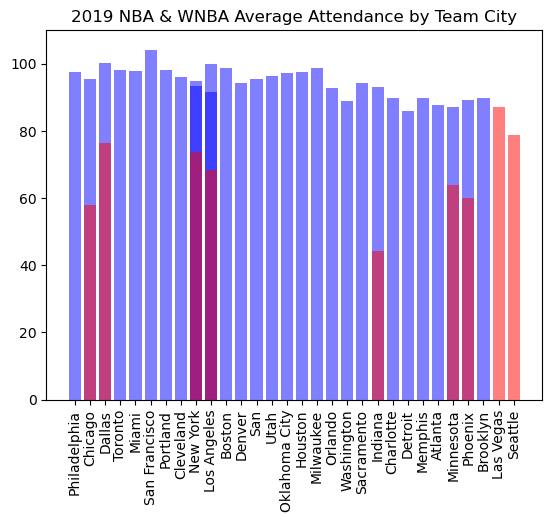

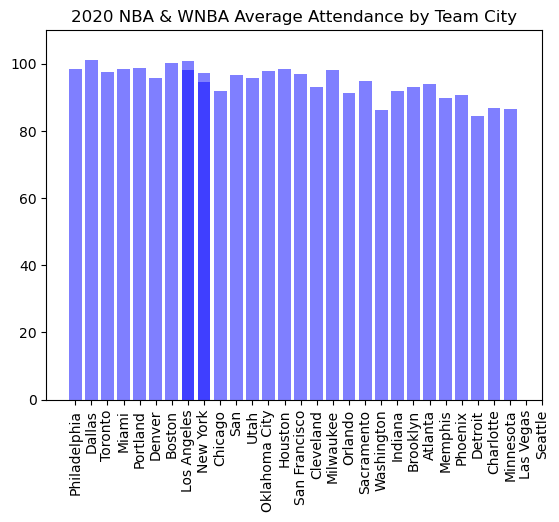

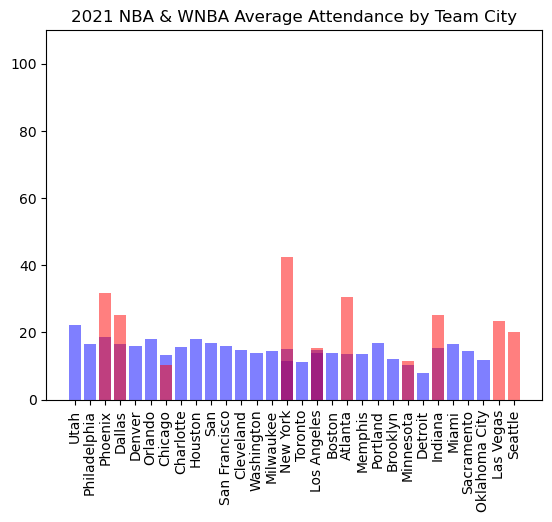

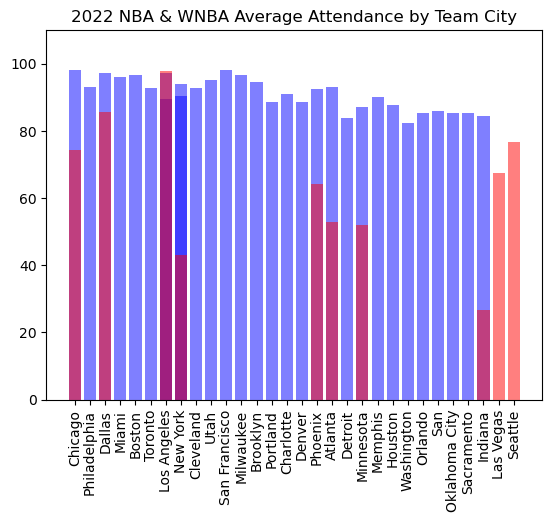

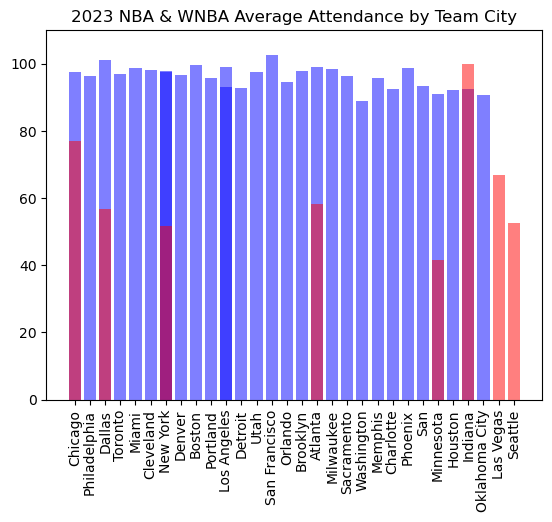

In [43]:
for year in range(2019,2024):
    plt.figure()
    nba_teams = nba_attendance[nba_attendance["Year"] == year]["City"]
    nba_overall_percent = nba_attendance[nba_attendance["Year"] == year]["Overall Percent"]
    nba_overall_average = nba_attendance[nba_attendance["Year"] == year]["Overall Average"]
    
    wnba_teams = wnba_attendance[wnba_attendance["Year"] == year]["City"]
    wnba_overall_percent = wnba_attendance[wnba_attendance["Year"] == year]["Overall Percent"]
    wnba_overall_average = wnba_attendance[wnba_attendance["Year"] == year]["Overall Average"]
    
    plt.bar(nba_teams, nba_overall_percent, color = "blue", alpha = .5)
    plt.bar(wnba_teams, wnba_overall_percent, color = "red", alpha = .5)
    plt.ylim(0,110)
    plt.title(f"{year} NBA & WNBA Average Attendance by Team City")
    plt.xticks(ticks = cities, rotation = 'vertical')
    plt.show
    plt.savefig(f"./graph_outputs/attendance_percentage_{year}.png")

TypeError: unhashable type: 'dict'

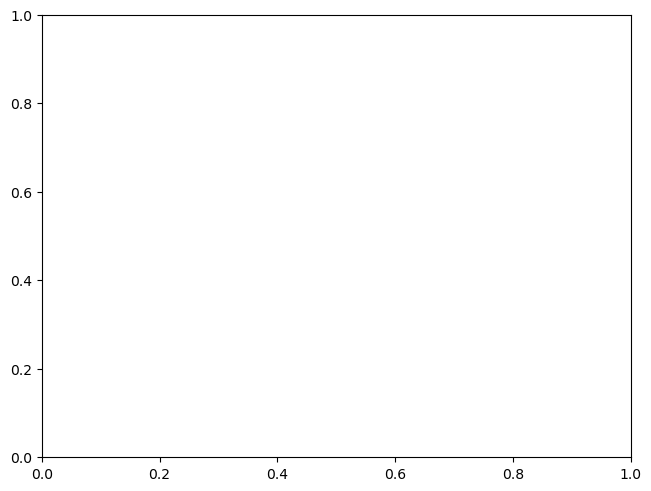

In [19]:
nba_cities = ['Atlanta','Chicago','Dallas','Indiana','Los Angeles','Phoenix','Minnesota','New York', "San Francisco",'Oklahoma City']
wnba_cities = ['Atlanta','Chicago','Dallas','Indiana','Los Angeles','Phoenix','Minnesota','New York','Las Vegas','Seattle']
cities = nba_cities + wnba_cities
cities_percent = {}
for city in cities:
    nba = {str(nba_attendance[nba_attendance["City"] == city]["Year"]): nba_attendance[nba_attendance["City"] == city]["Overall Percent"]}
    wnba = {str(wnba_attendance[wnba_attendance["City"] == city]["Year"]): wnba_attendance[wnba_attendance["City"] == city]["Overall Percent"]}
    cities_percent[city] = (nba, wnba)

x = np.arange(len(cities))
width = 0.25
multiplier = 0

fix, ax = plt.subplots(layout = 'constrained')

for city, percent in cities_percent.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, percent, width, label = city)
    ax.bar_label(rects, padding = 3)
    multiplier += 1
    
ax.set_ylabel('Attendance Capacity by %')
ax.set_title('Hmm')
ax.set_xticks(x + width, cities)
# ax.legend(loc = 'upper left', len(cities))
ax.set_ylim(0,250)